### Project : Credit Card Fraud Detection
### Email : nieldeshmukh02@gmail.com

## Fraud Detection

Fraud Detection is a technique used to identify unusual patterns that are different from the rest of the population and not behaving as expected. These unusual patterns are also called as outliers. 

The fraud detection involves in-depth data analysis/data-mining to recognize the unusual patterns.
In this dataset, most of the data analysis part is already done and most of the features are scaled. The names of the features are not shown due to privacy reasons.

Hence our main focus will be to balance the data and perform predective analysis.

## Problem Statement

The Credit Card Fraud Detection dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Goals

Goal here is to identify as much fraudulent credit card transactions as possible. And as mentioned in the dataset inspiration, calculation of accuracy using the Area Under the ROC(AUROC) as confusion matrix accuracy is not meaningful for unbalanced classification.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')


## Reading Dataset

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding data

In [3]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.shape

(284807, 31)

#### There are 284807 rows and 31 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


### Missing Value check

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**There are no null values in the dataset.**

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Thus there are 284807 rows and 31 columns.**

### Fraud Cases & Genuine Cases

In [9]:
fraud_cases=len(data[data['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [11]:
non_fraud_cases=len(data[data['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [13]:
fraud=data[data['Class']==1]

In [14]:
genuine=data[data['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Exploratory Data Analysis

Text(0.5, 1.0, 'Fraud vs Non-fraud cases Count')

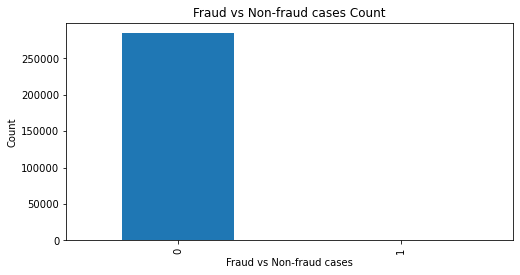

In [17]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(8,4))
ax = data.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

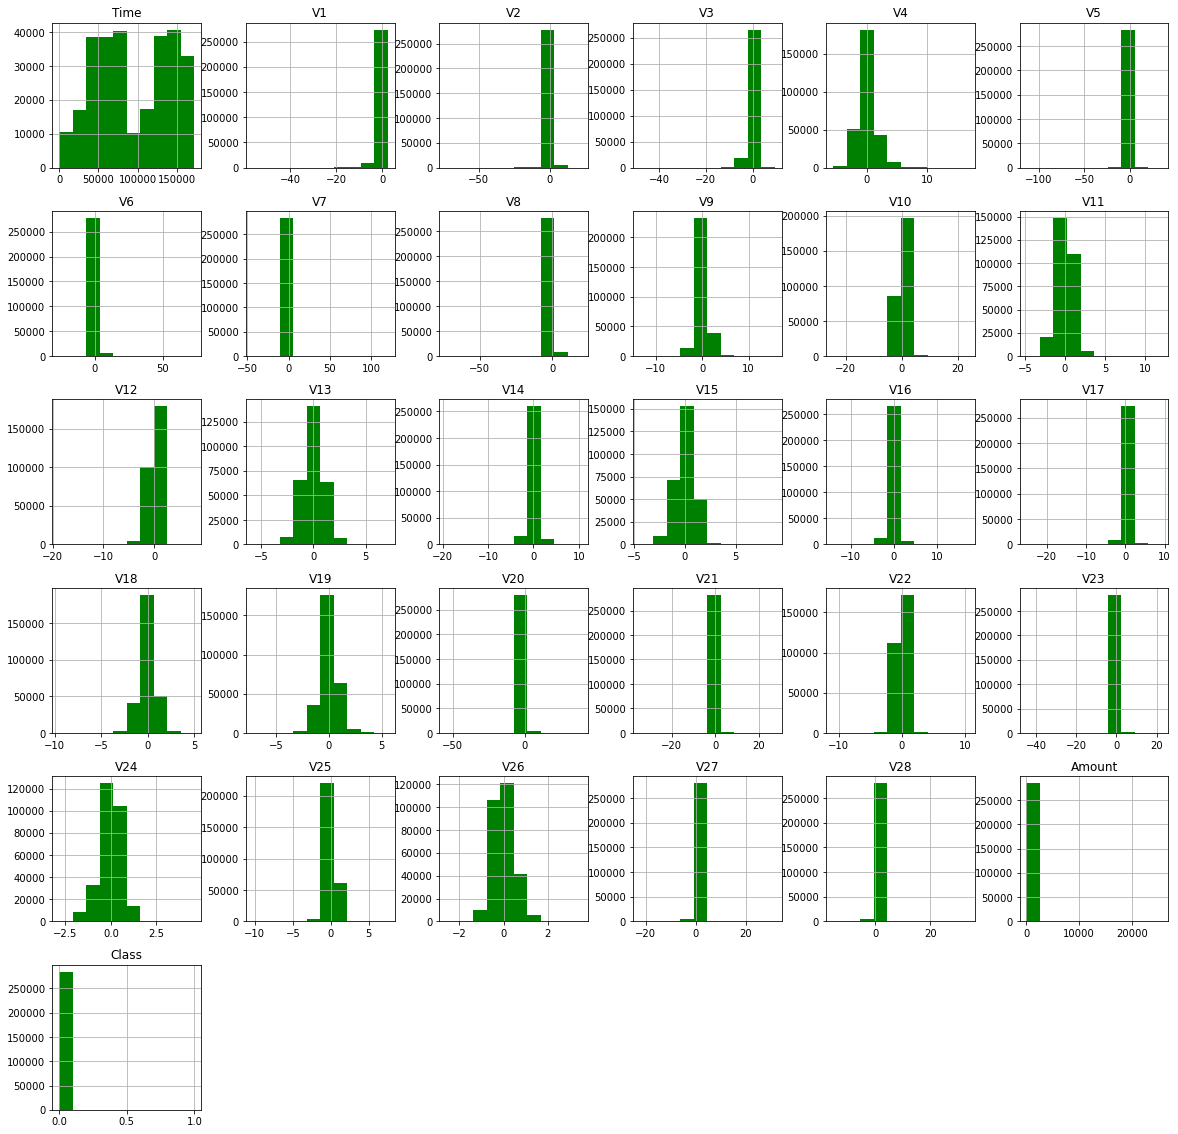

In [18]:
# Distribution of variables
data.hist(figsize=(20,20),color='green')
plt.show()

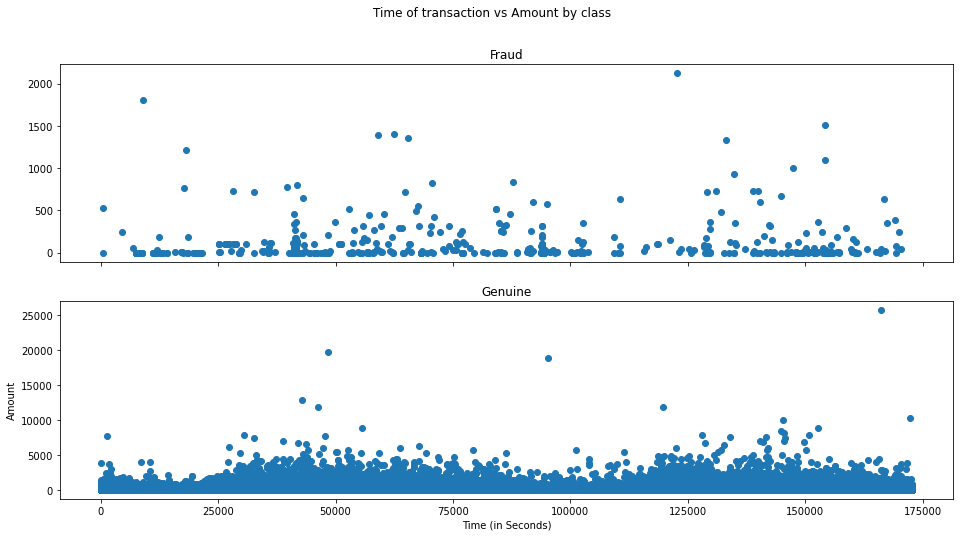

In [19]:
# Scatter plot showing Time of transaction vs Amount by class
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


### Correlation

<AxesSubplot:>

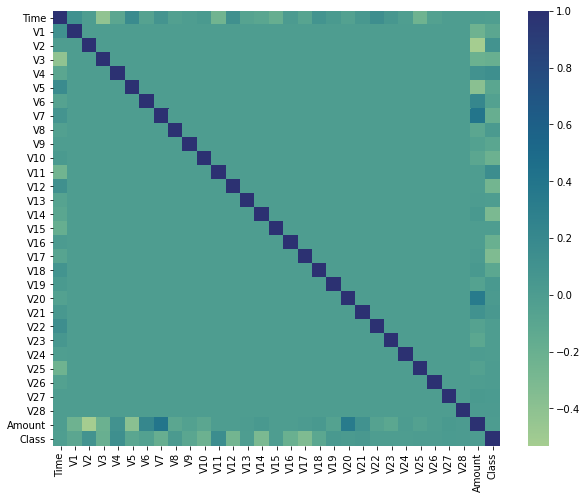

In [20]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='crest')

**Observations from Data-**
<a id = "data-observations"></a>

The data set is very imbalanced with only 492 Fraud records and 284315 Non-fraud records.
The dataset consists of numerical values from V1 to V28, which looks transformed from real data.
But 'Time' and 'Amount' features are not transformed. So we need scaling of dataset.
Using this data as it is with balancing it might overfit, but for comparison,we will first start with imbalanced data and see the results. Then we will balance the data and check the results again.

### Scaling

In [21]:
## scaling the "Amount" and "Time" columns similar to the others variables

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# now drop the original columns
data.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
# define X and y variables
X = data.drop(["Class"], axis = 1)
y = data["Class"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

Accuracy Score: 0.999204147794436
Recall Score: 0.6190476190476191
Precision Score: 0.883495145631068


In [25]:
print("\n*********Confusion Matrix*********")
print(confusion_matrix(y_test, y_pred))
print("\n*********Classification Report*********")
print(classification_report(y_test, y_pred))


*********Confusion Matrix*********
[[85284    12]
 [   56    91]]

*********Classification Report*********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



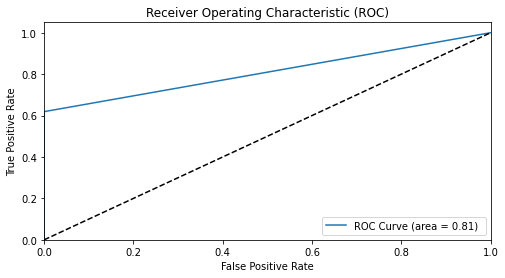

Logistic AUC = 0.81 


In [26]:
# let's measure the logistic model AUC
logistic_roc_auc = roc_auc_score(y_test, y_pred) # on test data
logistic_roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot of a ROC curve for a specific class # P(Y=1) ----- Prob of Survival
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f) ' % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc = 'lower right')
plt.show()

print("Logistic AUC = %2.2f " % logistic_roc_auc )

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

Accuracy Score: 0.9992392589211521
Recall Score: 0.7551020408163265
Precision Score: 0.7928571428571428


In [28]:
print("\n*********Confusion Matrix*********")
print(confusion_matrix(y_test, y_pred))
print("\n*********Classification Report*********")
print(classification_report(y_test, y_pred))


*********Confusion Matrix*********
[[85267    29]
 [   36   111]]

*********Classification Report*********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.76      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



## Balance data using undersampling method
#### This is an extremely unbalanced dataset so we need to take a subsample by undersampling

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [31]:
# number of fraud cases
frauds = len(data[data.Class == 1])

# selecting the indices of the non-fraud classes
fraud_indices = data[data.Class == 1].index
nonfraud_indices = data[data.Class == 0].index

# From all non-fraud observations, randomly select observations equal to number of fraud observations
random_nonfraud_indices = np.random.choice(nonfraud_indices, frauds, replace = False)
random_nonfraud_indices = np.array(random_nonfraud_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_nonfraud_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

# Now split X, y variables from the under sample data
X1 = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y1 = under_sample_data.loc[:, under_sample_data.columns == 'Class']
print(X1.shape, y1.shape) 

(984, 30) (984, 1)


## Predictive Analysis on Balanced Data

In [32]:
# Split dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train1, y_train1)
y_pred1 = logreg1.predict(X_test1)

print("Accuracy Score:", accuracy_score(y_test1, y_pred1))
print("Recall Score:", recall_score(y_test1, y_pred1))
print("Precision Score:", precision_score(y_test1, y_pred1))

Accuracy Score: 0.9290540540540541
Recall Score: 0.9183673469387755
Precision Score: 0.9375


In [34]:
print("\n*********Confusion Matrix*********")
print(confusion_matrix(y_test1, y_pred1))
print("\n*********Classification Report*********")
print(classification_report(y_test1, y_pred1))


*********Confusion Matrix*********
[[140   9]
 [ 12 135]]

*********Classification Report*********
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       149
           1       0.94      0.92      0.93       147

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



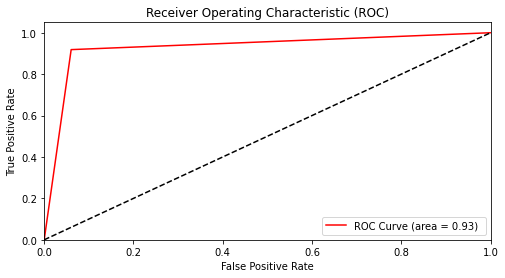

Logistic AUC = 0.93 


In [35]:
# let's measure the logistic model AUC
logistic_roc_auc1 = roc_auc_score(y_test1, y_pred1) # on test data
logistic_roc_auc1
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)

# Plot of a ROC curve for a specific class # P(Y=1) ----- Prob of Survival
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr,color='red', label = 'ROC Curve (area = %0.2f) ' % logistic_roc_auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc = 'lower right')
plt.show()

print("Logistic AUC = %2.2f " % logistic_roc_auc1 )

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier()
dtree1.fit(X_train1, y_train1)
y_pred1 = dtree1.predict(X_test1)

print("Accuracy Score:", accuracy_score(y_test1, y_pred1))
print("Recall Score:", recall_score(y_test1, y_pred1))
print("Precision Score:", precision_score(y_test1, y_pred1))

Accuracy Score: 0.8918918918918919
Recall Score: 0.9319727891156463
Precision Score: 0.8616352201257862


In [37]:
print("\n*********Confusion Matrix*********")
print(confusion_matrix(y_test1, y_pred1))
print("\n*********Classification Report*********")
print(classification_report(y_test1, y_pred1))


*********Confusion Matrix*********
[[127  22]
 [ 10 137]]

*********Classification Report*********
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       149
           1       0.86      0.93      0.90       147

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296



## Feature importance

In [38]:
X_train.columns[:-1]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount'],
      dtype='object')

Text(0.5, 0, 'Importance')

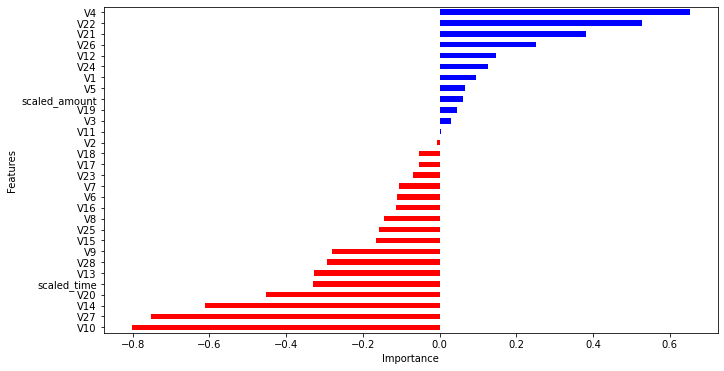

In [41]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels # col names
features['importance'] = coeff # beta
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)

features.importance.plot(kind='barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## Conclusion

After investigating and visualizing through the data, we found that the data is unbalanced. So we balanced the data.<br>
After balancing training data, we trainied it and these were the results-

<b>Logistic Regression</b> is giving 99% accuracy, 62% recall and 88% precision, 81% ROC AUC Score<br>
<b>Decision Tree</b> is giving 99% accuracy, 77% recall and 81% precision.

After Balancing the data (Undersampling):

<b>Logistic Regression</b> is giving 96% accuracy, 94% recall and 97% precision, 93% ROC AUC Score<br>
<b>Decision Tree</b> is giving 91% accuracy, 89% recall and 92% precision.